In [10]:
" cnn normal predict"

import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

# Set the directory path containing the test data
data_dir = '../data/processed/'

# Load the test data
X_test = np.load(data_dir + 'X_test_cs.npy')
y_test = np.load(data_dir + 'y_test_cs.npy', allow_pickle=True)

# Load the CNN model
model_cnn = load_model('../models/cnn_model.h5')

# Ensure the test data has the correct shape
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

# Check the model summary
# model_cnn.summary()
# print(X_test.shape)

# Evaluate the CNN model
scores = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

# Predict and generate a classification report
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))




(756, 4)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 156800)  

In [13]:
"""cnn_type ptedice """

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Data path
data_dir = '../data/processed/'

# Load predict data
X_test = np.load(data_dir + 'X_test_cs_type.npy')
y_test = np.load(data_dir + 'y_test_cs_type.npy', allow_pickle=True)

# Load types data
types_test = np.load(data_dir + 'types_test_cs_type.npy', allow_pickle=True)

# load cnn_multi model
model_cnn_multi_input = load_model('../models/cnn_multi_input_model.h5')

# evaluate model
scores = model_cnn_multi_input.evaluate([X_test, types_test], y_test, verbose=0)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

# Predict
y_pred = model_cnn_multi_input.predict([X_test, types_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Predict and generate a classification report
print(classification_report(y_test_classes, y_pred_classes))





Test Loss: 1.068126916885376
Test Accuracy: 0.5899471044540405
              precision    recall  f1-score   support

           0       0.55      0.98      0.70       369
           1       0.91      0.27      0.42       117
           2       0.00      0.00      0.00        97
           3       0.85      0.31      0.45       173

    accuracy                           0.59       756
   macro avg       0.58      0.39      0.39       756
weighted avg       0.60      0.59      0.51       756



/Users/viennacacao/anaconda3/envs/ca_tfs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viennacacao/anaconda3/envs/ca_tfs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viennacacao/anaconda3/envs/ca_tfs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [16]:
# 分离单晶和多晶数据
mono_indices = np.where(types_test == 0)[0]
poly_indices = np.where(types_test == 1)[0]

X_test_mono = X_test[mono_indices]
y_test_mono = y_test[mono_indices]
X_test_poly = X_test[poly_indices]
y_test_poly = y_test[poly_indices]

# 准备类型输入
type_input_mono = np.zeros((len(X_test_mono), 1))
type_input_poly = np.ones((len(X_test_poly), 1))

# 评估单晶电池图像
test_loss_mono, test_accuracy_mono = model_cnn_multi_input.evaluate([X_test_mono, type_input_mono], y_test_mono, verbose=1)
print(f"Mono Test Loss: {test_loss_mono}, Mono Test Accuracy: {test_accuracy_mono}")

# 评估多晶电池图像
test_loss_poly, test_accuracy_poly = model_cnn_multi_input.evaluate([X_test_poly, type_input_poly], y_test_poly, verbose=1)
print(f"Poly Test Loss: {test_loss_poly}, Poly Test Accuracy: {test_accuracy_poly}")

10/10 [==============================] - 4s 294ms/step - loss: 0.8348 - accuracy: 0.7085
Mono Test Loss: 0.8347570300102234, Mono Test Accuracy: 0.7084745764732361
15/15 [==============================] - 5s 300ms/step - loss: 1.2175 - accuracy: 0.5141
Poly Test Loss: 1.2174633741378784, Poly Test Accuracy: 0.5140997767448425


In [17]:
"""cnn_type_pc predict """

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

data_dir = '../data/processed/'

# load data
X_test = np.load(data_dir + 'X_test_cs_type_pc.npy')
y_test = np.load(data_dir + 'y_test_cs_type_pc.npy', allow_pickle=True)

# Load previously saved type data
types_test = np.load(data_dir + 'types_test_cs_type_pc.npy', allow_pickle=True)

# Load model
model_cnn_multi_input = load_model('../models/cnn_multi_input_pc_model.h5')

# Evaluation model
scores = model_cnn_multi_input.evaluate([X_test, types_test], y_test, verbose=0)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

# predict
y_pred = model_cnn_multi_input.predict([X_test, types_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print Classification Report
print(classification_report(y_test_classes, y_pred_classes))



Test Loss: 0.7479132413864136
Test Accuracy: 0.7394179701805115
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       369
           1       0.97      0.30      0.46       117
           2       0.97      0.77      0.86        97
           3       0.82      0.54      0.65       173

    accuracy                           0.74       756
   macro avg       0.86      0.64      0.69       756
weighted avg       0.79      0.74      0.72       756



              precision    recall  f1-score   support

           0       0.67      0.96      0.79       369
           1       0.97      0.30      0.46       117
           2       0.97      0.77      0.86        97
           3       0.82      0.54      0.65       173

    accuracy                           0.74       756
   macro avg       0.86      0.64      0.69       756
weighted avg       0.79      0.74      0.72       756



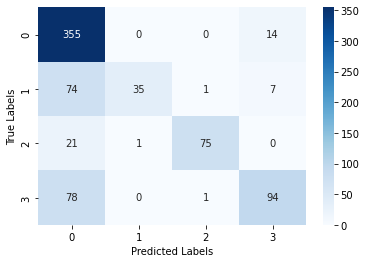

10/10 [==============================] - 3s 335ms/step - loss: 0.7807 - accuracy: 0.7322
Mono Test Loss: 0.7806785702705383, Mono Test Accuracy: 0.7322033643722534
15/15 [==============================] - 6s 365ms/step - loss: 0.7269 - accuracy: 0.7440
Poly Test Loss: 0.7269461750984192, Poly Test Accuracy: 0.7440347075462341


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Build confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Draw confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Separate mono- and poly-crystal data
mono_indices = np.where(types_test == 0)[0]
poly_indices = np.where(types_test == 1)[0]

X_test_mono = X_test[mono_indices]
y_test_mono = y_test[mono_indices]
X_test_poly = X_test[poly_indices]
y_test_poly = y_test[poly_indices]

# Prepare type input
type_input_mono = np.zeros((len(X_test_mono), 1))
type_input_poly = np.ones((len(X_test_poly), 1))

# Evaluate mono-crystal battery images
test_loss_mono, test_accuracy_mono = model_cnn_multi_input.evaluate([X_test_mono, type_input_mono], y_test_mono, verbose=1)
print(f"Mono Test Loss: {test_loss_mono}, Mono Test Accuracy: {test_accuracy_mono}")

# Evaluate poly-crystal battery images
test_loss_poly, test_accuracy_poly = model_cnn_multi_input.evaluate([X_test_poly, type_input_poly], y_test_poly, verbose=1)
print(f"Poly Test Loss: {test_loss_poly}, Poly Test Accuracy: {test_accuracy_poly}")

In [ ]:
"""
svm pretest
"""

import joblib

# 加载SVM模型
pipeline_svm = joblib.load('../models/svm_model.joblib')

# 展平测试数据集以适配SVM分类器
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# 将one-hot编码的y_test转换回整数类别标签，如果它是one-hot编码的
# 如果y_test已经是整数标签的，请跳过这一步
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# 转换整数标签到字符串标签
y_test_labels_str = [reverse_label_mapping[i] for i in y_test_labels]

# 使用测试集评估模型
y_pred_svm = pipeline_svm.predict(X_test_flat)

reverse_label_mapping = {0: '正常', 1: '轻微缺陷', 2: '中度缺陷', 3: '重度缺陷'}

y_pred_svm_labels = [reverse_label_mapping[i] for i in y_pred_svm]

print(classification_report(y_test_labels_str, y_pred_svm_labels))



24/24 [==============================] - 39s 2s/step - loss: 0.7279 - accuracy: 0.7434
Test Loss: 0.7278631329536438
Test Accuracy: 0.7433862686157227
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       369
           1       1.00      0.28      0.44       117
           2       0.97      0.77      0.86        97
           3       0.97      0.51      0.67       173

    accuracy                           0.74       756
   macro avg       0.90      0.64      0.69       756
weighted avg       0.82      0.74      0.72       756



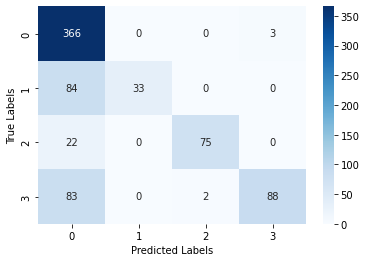

In [8]:
"agu_trans_model_predict"

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Set the path to the dataset
base_path = os.path.dirname(os.getcwd()) 
model_path = os.path.join(base_path, 'models/transformer_with_type_aug_model.h5') 
# moedl_path = "../models"
# Load model
model = load_model(model_path)
X_test = np.load('../data/processed/X_test_transformer_types_aug.npy')
y_test = np.load('../data/processed/y_test_transformer_types_aug.npy')
types_test = np.load('../data/processed/types_test_aug.npy')

test_loss, test_accuracy = model.evaluate([X_test, types_test.reshape(-1, 1)], y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predict
y_pred = model.predict([X_test, types_test.reshape(-1, 1)])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Build confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate Classification Report
print(classification_report(y_true_classes, y_pred_classes))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [14]:
# Separating monocrystalline and polycrystalline data
mono_indices = np.where(types_test == 0)[0]
poly_indices = np.where(types_test == 1)[0]

X_test_mono = X_test[mono_indices]
y_test_mono = y_test[mono_indices]
X_test_poly = X_test[poly_indices]
y_test_poly = y_test[poly_indices]

# Preparing type input
type_input_mono = np.zeros((len(X_test_mono), 1))
type_input_poly = np.ones((len(X_test_poly), 1))

# Evaluating monocrystalline cell images
test_loss_mono, test_accuracy_mono = model.evaluate([X_test_mono, type_input_mono], y_test_mono, verbose=1)
print(f"Mono Test Loss: {test_loss_mono}, Mono Test Accuracy: {test_accuracy_mono}")

# Evaluating polycrystalline cell images
test_loss_poly, test_accuracy_poly = model.evaluate([X_test_poly, type_input_poly], y_test_poly, verbose=1)
print(f"Poly Test Loss: {test_loss_poly}, Poly Test Accuracy: {test_accuracy_poly}")


10/10 [==============================] - 18s 1s/step - loss: 0.7798 - accuracy: 0.7220
Mono Test Loss: 0.7797507643699646, Mono Test Accuracy: 0.7220339179039001
15/15 [==============================] - 22s 1s/step - loss: 0.6981 - accuracy: 0.7549
Poly Test Loss: 0.6980980038642883, Poly Test Accuracy: 0.7548806667327881
